In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Online_Dating_Behavior_Dataset.csv')

## EXPLORATORY DATA ANALYSIS¶


In [ ]:
df.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
0,0,1,51777,3,47,5,70
1,1,0,36646,0,42,7,130
2,0,0,53801,1,25,5,0
3,0,0,56105,0,35,8,0
4,0,0,55597,1,36,6,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          1000 non-null   int64
 1   PurchasedVIP    1000 non-null   int64
 2   Income          1000 non-null   int64
 3   Children        1000 non-null   int64
 4   Age             1000 non-null   int64
 5   Attractiveness  1000 non-null   int64
 6   Matches         1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,1000.0,0.510,0.500150,0.0,0.0,1.0,1.0,1.0
PurchasedVIP,1000.0,0.474,0.499573,0.0,0.0,0.0,1.0,1.0
Income,1000.0,50988.447,9889.336141,20786.0,44358.5,50841.5,57396.0,81931.0
Children,1000.0,0.978,0.997251,0.0,0.0,1.0,2.0,3.0
Age,1000.0,34.616,9.147799,18.0,27.0,35.0,43.0,49.0
Attractiveness,1000.0,5.624,2.824288,1.0,3.0,6.0,8.0,10.0
Matches,1000.0,76.050,52.713150,0.0,0.0,70.0,120.0,160.0


In [ ]:
df['Gender'].value_counts(), df['Attractiveness'].value_counts(), df['Children'].value_counts()

(Gender
 1    510
 0    490
 Name: count, dtype: int64,
 Attractiveness
 6     116
 7     115
 10    106
 9     104
 3     104
 4     104
 2      94
 5      88
 8      86
 1      83
 Name: count, dtype: int64,
 Children
 0    412
 1    294
 2    198
 3     96
 Name: count, dtype: int64)

**Note** -> Gender(0->Male, 1->Female)

<Axes: >

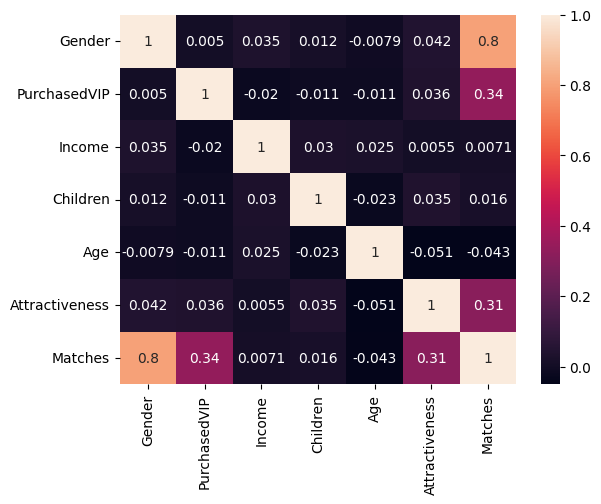

In [ ]:
sns.heatmap(df.corr(),annot=True)

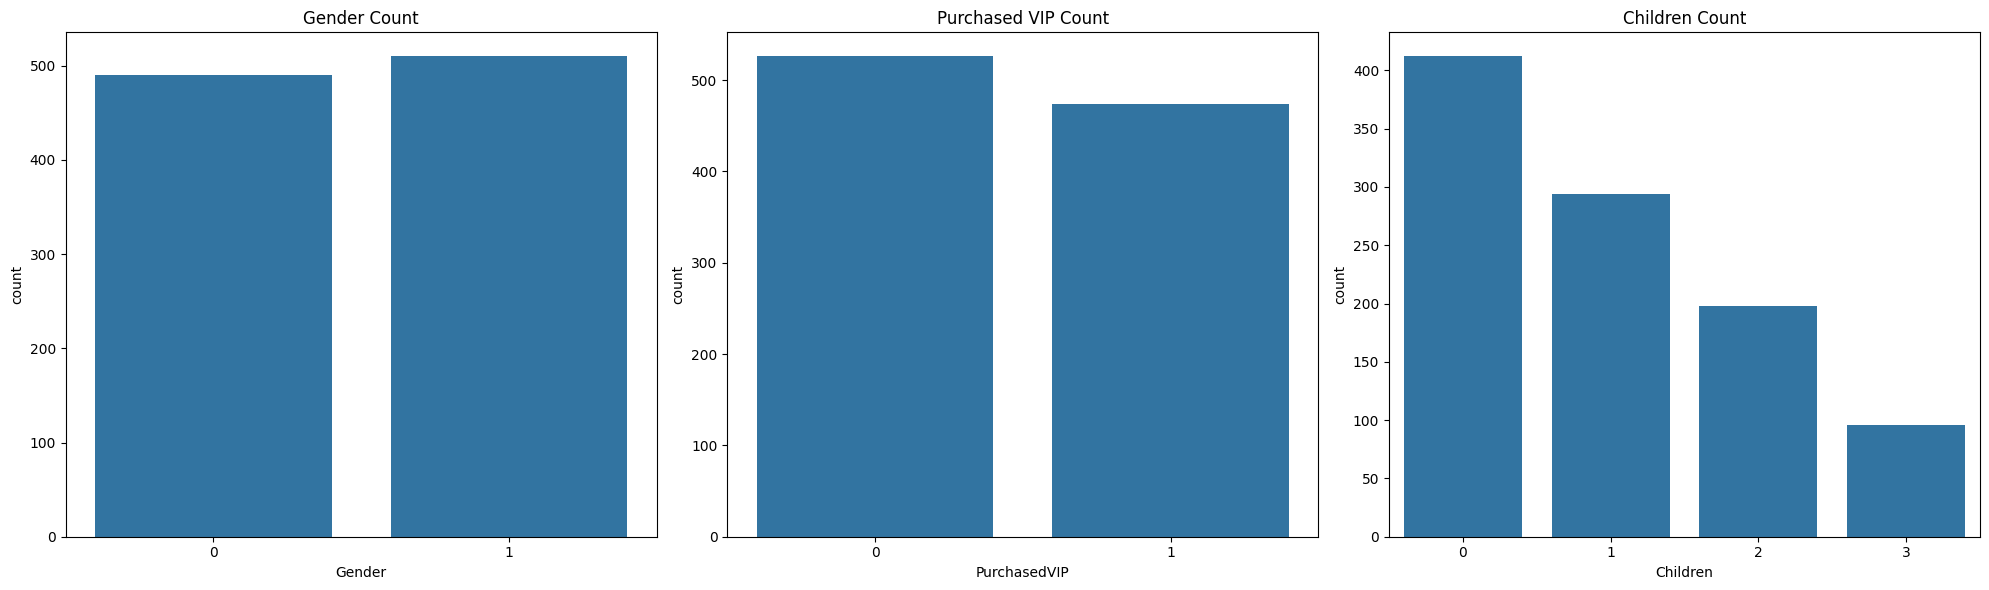

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
sns.countplot(x='Gender', data=df, ax=axs[0])
axs[0].set_title('Gender Count')

sns.countplot(x='PurchasedVIP', data=df, ax=axs[1])
axs[1].set_title('Purchased VIP Count')

sns.countplot(x='Children', data=df, ax=axs[2])
axs[2].set_title('Children Count')

fig.tight_layout()

plt.show()

In [ ]:
df.groupby('Gender')['Matches'].mean()

Gender
0     33.000000
1    117.411765
Name: Matches, dtype: float64

## Models:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = df.drop(['Matches'], axis=1)
y = df['Matches']
X, y

(     Gender  PurchasedVIP  Income  Children  Age  Attractiveness
 0         0             1   51777         3   47               5
 1         1             0   36646         0   42               7
 2         0             0   53801         1   25               5
 3         0             0   56105         0   35               8
 4         0             0   55597         1   36               6
 ..      ...           ...     ...       ...  ...             ...
 995       0             0   36799         0   28               1
 996       0             1   43882         2   46               9
 997       1             0   49629         2   49               6
 998       1             0   45706         1   22               8
 999       0             0   43075         0   43               3
 
 [1000 rows x 6 columns],
 0       70
 1      130
 2        0
 3        0
 4        0
       ... 
 995      0
 996     70
 997    120
 998    140
 999      0
 Name: Matches, Length: 1000, dtype: int64)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 6), (200, 6), (800,), (200,))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Random Forest Regression', RandomForestRegressor())
]

In [ ]:
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name}:")
    print(f"  Mean Squared Error: {mse}")
    print(f"  R-squared: {r2}")
    print("-" * 30)

Linear Regression:
  Mean Squared Error: 518.3432574571533
  R-squared: 0.8097536666224447
------------------------------
Ridge Regression:
  Mean Squared Error: 518.3431205759473
  R-squared: 0.8097537168616389
------------------------------
Lasso Regression:
  Mean Squared Error: 525.9446385845091
  R-squared: 0.8069637491936368
------------------------------
Decision Tree Regression:
  Mean Squared Error: 0.0
  R-squared: 1.0
------------------------------
Random Forest Regression:
  Mean Squared Error: 0.0
  R-squared: 1.0
------------------------------
